In [50]:
#What is  Recommender Systems ?
#when there is huge amount of data ,then data is used for building efficient system ,then recommendation comes into picture 
#They improve the quality of search items in efficient manner.And provide the item of our choice.
#They are used to predict the rating or preference that a user would give to an item.
#Almost every major tech company has applied them in some form or the other,
#Amazon uses it to suggest products to customers, YouTube uses it to decide which video to play next on autoplay, and 
#Facebook uses it to recommend pages to like and people to follow. 
#Moreover, companies like Netflix and Spotify depend highly on the effectiveness of their recommendation engines for their business and sucees.

In [51]:
#Classification of Recommendation System based on research papar:
    
#1.Demographic Filtering or Hybrid filtring - >They offer generalized recommendations to every user, based on movie popularity and/or genre.
#2.Content Based Filtering- >based on a particular item. if a person liked a particular item, he or she will also like an item that is similar to it.
#3.Collaborative Filtering- This system matches persons with similar interests and provides recommendations based on this matching

In [52]:
#LOADING OF ML LIBRARIES 
!pip install surprise
import pandas as pd 
import numpy as np 

In [53]:
#LOADING OF THE DATA SET TO ANALYSE

df1=pd.read_csv(r'C:\Users\ASUS\Dropbox\My PC (LAPTOP-8TIB6LF5)\Downloads\tmdb_5000_credits.csv')
df2=pd.read_csv(r'C:\Users\ASUS\Dropbox\My PC (LAPTOP-8TIB6LF5)\Downloads\tmdb_5000_movies.csv')
df2.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [54]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')


In [55]:
C= df2['vote_average'].mean()
C
# C is the mean of all the movies scaled on the chart .We can say mean of all the movies are 6 out of the 10

6.092171559442011

In [56]:
m= df2['vote_count'].quantile(0.9)
m
# our criteria to include the movie is the that , it must have more votes than at least 90% of the movies in the list.

1838.4000000000015

In [57]:
q_movies = df2.copy().loc[df2['vote_count'] >= m]
q_movies.shape
#counting the movies which can be included in the chart

(481, 23)

In [58]:
# there are 481 movies which qualify to be in this list.

In [59]:
#NOW WE WILL CALCULATE THE MATRICS FOR EACH QUALIFIED MOVIE

In [60]:
#THE FORMULA TO CALCULATE THE WEIGHTED RATING= (V/(V+M))*R + (M/(V+M))*C;
#WHERE V IS THE NO OF VOTES FOR THE MOVIE
#M IS THE MINIMUM NO VOTES REQUIRED FOR THE MOVIE
# R IS THE AVERAGE RATING OF THE MOVIE
#C IS THE MEAN VOTES OF THE MOVIE ACROSS WHOLE REPORT

def weighted_rating(x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']

    return (v/(v+m) * R) + (m/(m+v) * C)

 # Calculation based on the IMDB  formula

In [61]:
#we are calculating the score for every movie
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [62]:
# SORTED THE MOVIES BASED ON THE SCORE OF EACH MOVIE
q_movies = q_movies.sort_values('score', ascending=False)

#print the top 10 movies after sorting 

q_movies[['title', 'vote_count', 'vote_average', 'score']].head(10)

,title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Popular Movies')

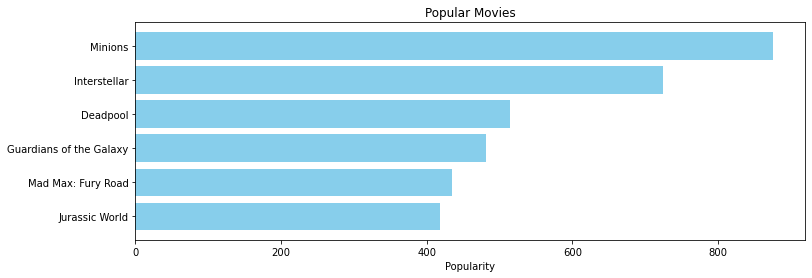

In [63]:
#Plotted the graph on 6 values based on the their popularity.

pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

In [64]:

# print entries of the overview
df2['overview'].head(5)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [65]:
#CONTENT BASED FILTRING 

# IN THIS TYPE OF RECOMMENDER SYSTEMS CONTENT IS BEING USED TO CLASSIFY THE SIMILARTY BETWEEN OTHER MOVIES
#we'll compute Term Frequency-Inverse Document Frequency (TF-IDF) vectors for each overview.
#Now if you are wondering what is term frequency , it is the relative frequency of a word in a document 
#and is given as (term instances/total instances). 
#Inverse Document Frequency is the relative count of documents containing the term is given as log(number of documents/documents with term) 
#The overall importance of each word to the documents in which they appear is equal to TF * IDF

In [66]:

#Import TfIdfVectorizer from scikit-learn

from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words such as 'the', 'a'

tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string

df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data

tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix

tfidf_matrix.shape

(4803, 20978)

In [67]:
#we got 4800 movies which is defined by approximately 20000 words

In [68]:
#we can now compute a similarity score. There are several candidates for this; such as the euclidean,
#the Pearson and the cosine similarity scores. there is no best score from any algorithm
#we use cosine similarty algorithm =cos(theta)=A.B/(|A|.|B|)

In [69]:
#Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score.
#Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster AND effecient.

In [70]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [71]:
#Construct a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [72]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [73]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: title, dtype: object

In [74]:
get_recommendations('The Avengers')

7               Avengers: Age of Ultron
3144                            Plastic
1715                            Timecop
4124                 This Thing of Ours
3311              Thank You for Smoking
3033                      The Corruptor
588     Wall Street: Money Never Sleeps
2136         Team America: World Police
1468                       The Fountain
1286                        Snowpiercer
Name: title, dtype: object

In [75]:
from ast import literal_eval

features = ['cast', 'crew', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(literal_eval)

In [76]:
# Get the director's name from the crew feature. If director is not listed, return NaN
def get_director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan

In [77]:
# Returns the list top 3 elements or entire list; whichever is more.
def get_list(x):
    if isinstance(x, list):
        names = [i['name'] for i in x]
        #Check if more than 3 elements exist. If yes, return only first three. If no, return entire list.
        if len(names) > 3:
            names = names[:3]
        return names

    #Return empty list in case of missing/malformed data
    return []

In [78]:
# Define new director, cast, genres and keywords features that are in a suitable form.
df2['director'] = df2['crew'].apply(get_director)

features = ['cast', 'keywords', 'genres']
for feature in features:
    df2[feature] = df2[feature].apply(get_list)

In [79]:
# Print the new features of the first 3 films
df2[['title', 'cast', 'director', 'keywords', 'genres']].head(3)

,title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"


In [80]:
# FUNCTION THAT WILL CONVERT STRING INTO LOWER CASE AND GROUP THE ELEMENT TOGETHER WHERE IT WILL FIND SPACE 

In [81]:
def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [82]:
clean_data("IIT ISM DHANBAD") #eg

'iitismdhanbad'

In [83]:
df2

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,spoken_languages,status,tagline,title,vote_average,vote_count,tittle,cast,crew,director
0,237000000,"[Action, Adventure, Fantasy]",http://www.avatarmovie.com/,19995,"[culture clash, future, space war]",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]","[{'credit_id': '52fe48009251416c750aca23', 'de...",James Cameron
1,300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,285,"[ocean, drug abuse, exotic island]",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]","[{'credit_id': '52fe4232c3a36847f800b579', 'de...",Gore Verbinski
2,245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,206647,"[spy, based on novel, secret agent]",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]","[{'credit_id': '54805967c3a36829b5002c41', 'de...",Sam Mendes
3,250000000,"[Action, Crime, Drama]",http://www.thedarkknightrises.com/,49026,"[dc comics, crime fighter, terrorist]",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]","[{'credit_id': '52fe4781c3a36847f81398c3', 'de...",Christopher Nolan
4,260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,49529,"[based on novel, mars, medallion]",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]","[{'credit_id': '52fe479ac3a36847f813eaa3', 'de...",Andrew Stanton
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[Action, Crime, Thriller]",NaN,9367,"[united states–mexico barrier, legs, arms]",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]",...,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238,El Mariachi,"[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...","[{'credit_id': '52fe44eec3a36847f80b280b', 'de...",Robert Rodriguez
4799,9000,"[Comedy, Romance]",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],...,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5,Newlyweds,"[Edward Burns, Kerry Bishé, Marsha Dietlein]","[{'credit_id': '52fe487dc3a368484e0fb013', 'de...",Edward Burns
4800,0,"[Comedy, Drama, Romance]",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[date, love at first sight, narration]",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""id"": 3958}

In [84]:
#NOW JUST APPLY CLEAN DATA FUNCTION TO FEATURES 

In [85]:
features = ['cast', 'keywords', 'director', 'genres']

for feature in features:
    df2[feature] = df2[feature].apply(clean_data)

In [86]:
#printing the features
for i in features:
    print(df2[i])

0        [samworthington, zoesaldana, sigourneyweaver]
1           [johnnydepp, orlandobloom, keiraknightley]
2            [danielcraig, christophwaltz, léaseydoux]
3            [christianbale, michaelcaine, garyoldman]
4          [taylorkitsch, lynncollins, samanthamorton]
                             ...                      
4798    [carlosgallardo, jaimedehoyos, petermarquardt]
4799         [edwardburns, kerrybishé, marshadietlein]
4800           [ericmabius, kristinbooth, crystallowe]
4801            [danielhenney, elizacoupe, billpaxton]
4802    [drewbarrymore, brianherzlinger, coreyfeldman]
Name: cast, Length: 4803, dtype: object
0               [cultureclash, future, spacewar]
1               [ocean, drugabuse, exoticisland]
2               [spy, basedonnovel, secretagent]
3            [dccomics, crimefighter, terrorist]
4                [basedonnovel, mars, medallion]
                          ...                   
4798    [unitedstates–mexicobarrier, legs, arms]
4799        

In [87]:
# now we want to create a group which contains of  ('cast', 'keywords', 'director', 'genres')

def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

In [88]:
#Now we will make a group so that vector could feed with all field

def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df2['soup'] = df2.apply(create_soup, axis=1)

In [89]:
#The next thing is very important because i have used CountVectorizer() instead of  TF-IDF .
#This is because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies.
#It doesn't make much intuitive sense.

In [90]:
# Import CountVectorizer and create the count matrix

from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df2['soup'])

In [91]:
#Now i have compute the cosine similarity based on the matrix 

In [97]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [98]:
# Reset index of our main DataFrame and construct reverse mapping as before

In [99]:
df2 = df2.reset_index()
indices = pd.Series(df2.index, index=df2['title'])

In [100]:
#REUSING THE SAME GET get_recommendations() FUNCTION FOR CountVectorizer

In [101]:
get_recommendations('The Dark Knight Rises', cosine_sim2)

65               The Dark Knight
119                Batman Begins
4638    Amidst the Devil's Wings
1196                The Prestige
3073           Romeo Is Bleeding
3326              Black November
1503                      Takers
1986                      Faster
303                     Catwoman
747               Gangster Squad
Name: title, dtype: object

In [102]:
get_recommendations('The Godfather', cosine_sim2)

867      The Godfather: Part III
2731      The Godfather: Part II
4638    Amidst the Devil's Wings
2649           The Son of No One
1525              Apocalypse Now
1018             The Cotton Club
1170     The Talented Mr. Ripley
1209               The Rainmaker
1394               Donnie Brasco
1850                    Scarface
Name: title, dtype: object

In [103]:
# The previously used filtering method that was content based which was widely used .But it has large no of limitations.
#It only suggest which are close to that movie ,it does not support taste and genere of the user ,So there was lack of personal taste and 
# bais for user 
#Collaborative Filtering---->1.User based filtering 2.Item Based Collaborative Filtering ,later in thoery i will explain

In [104]:
#Now comes the single value decomposition (SVD)


In [114]:
from surprise import SVD, Reader
from surprise import Dataset
from surprise.model_selection import cross_validate

reader = Reader()
ratings =pd.read_csv(r'C:\Users\ASUS\Dropbox\My PC (LAPTOP-8TIB6LF5)\Downloads\ratings_small.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [115]:
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Use SVD algorithm or other models
model = SVD()

# cross-validation with no. of kfold=5 (can be changed per your need)
cross_validate(model, data, measures=['rmse', 'mae'], cv=5)

{'test_rmse': array([0.89303737, 0.8969145 , 0.892358  , 0.90405507, 0.89765588]),
 'test_mae': array([0.68921694, 0.69206311, 0.68622541, 0.69472519, 0.69223105]),
 'fit_time': (1.901749610900879,
  1.8957815170288086,
  1.9433465003967285,
  1.9713687896728516,
  1.9365556240081787),
 'test_time': (0.28158092498779297,
  0.26731252670288086,
  0.26122236251831055,
  0.2905435562133789,
  0.44945383071899414)}

In [116]:
#I GOT ROOT MEAN SQUARE  VALUE APPROX=0.89 

In [118]:
#training of the data and fitting to the model
data_train = data.build_full_trainset()
model.fit(data_train)

In [119]:
model.predict(1, 302, 3)

Prediction(uid=1, iid=302, r_ui=3, est=2.7606651534080493, details={'was_impossible': False})

In [120]:
# for model movie ID  no 302 i got value of 2.7606, 

In [ ]:
#Referances:-
#1.https://hackernoon.com/introduction-to-recommender-system-part-1-collaborative-filtering-singular-value-decomposition-44c9659c5e75
#2.https://www.kaggle.com/rounakbanik/movie-recommender-systems
#3.http://trouvus.com/wp-content/uploads/2016/03/A-hybrid-movie-recommender-system-based-on-neural-networks.pdf